In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import xarray as xr


#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [4]:
hf.keys()

<KeysViewHDF5 ['data']>

In [5]:
data = np.array(hf.get('data'))


In [6]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [7]:
hf.close()

# Problem 1

In [8]:
# 1)
time = data[0]
Solar_phase = data[1]
Earth_longitude = data[2]
counts = data[3]


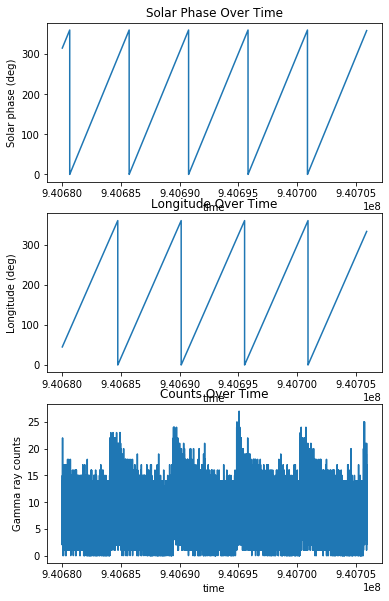

In [9]:
size = int(len(time)/100)
plt.subplots_adjust(top=2)
plt.subplot(3, 1, 1)
plt.plot(time[:size], Solar_phase[:size])
plt.title("Solar Phase Over Time")
plt.ylabel("Solar phase (deg)")
plt.xlabel("time")
plt.subplot(3,1,2)
plt.plot(time[:size], Earth_longitude[:size])
plt.title("Longitude Over Time")
plt.ylabel("Longitude (deg)")
plt.xlabel("time")
plt.subplot(3,1,3)
plt.plot(time[:size], counts[:size])
plt.title("Counts Over Time")
plt.ylabel("Gamma ray counts")
plt.xlabel("time")
plt.show()

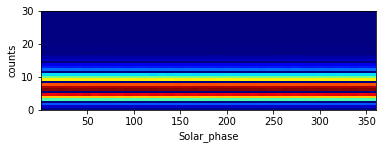

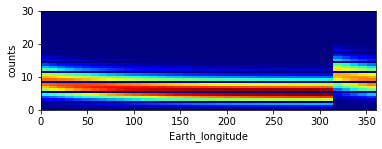

In [10]:
plt.subplot(2, 1, 1)
plt.xlabel('Solar_phase')
plt.ylabel('counts')
plt.hist2d(Solar_phase, counts, bins=(40, 40), cmap=plt.cm.jet)
plt.show()
plt.subplot(2, 1, 2)
plt.xlabel('Earth_longitude')
plt.ylabel('counts')
plt.hist2d(Earth_longitude, counts, bins=(40, 40), cmap=plt.cm.jet)
plt.show()

# Discussion
# # Give a high level description of the data features you see. 
# # Specifically comment on whether you see signal contamination in your data, 
# # and how you plan to build a background pdf().


The dataset contains 4 columns and almost 26 million records. These columns are given as GPS time, solar phase (deg), Earth longitude (deg), and gamma-ray counts. Data is taken every 100 milliseconds.


The Data is periodic which is similar to both period of Solar_phase and period of Earth_longitude. 
So I plot 2D histogram for both longtitude and phase vs counts distribution. As I got from 2d histogram,
the longtitude degree will influence the counts distrbution and the mean counts as well. And the solar phase 
has no influence, because as the increasing of solar phase, the distribution of counts is constant.

In degree from 150 to 300, there is a concentration at mean value (the red color is deeper). 
So i consider there is a contimination.

since the counts distribution is determined by the Earth Longtitude. 
In order to build exact distrbution of counts for background,
we need to know what degree of longtitude is. And then get the background from dataset.
So with specific longtitude, I make a distribution for counts distribution of that 


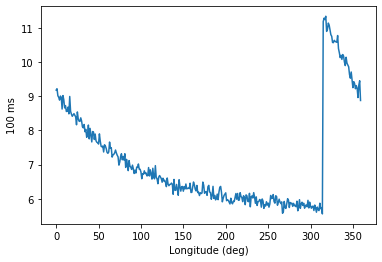

7.089283947408948

In [11]:
# 2)  Discussion
# The background is not consistent across the dataset.
# Find and describe as accurately as you can how the background changes.

means = [np.mean(counts[Earth_longitude==i]) for i in np.arange(360)]
plt.plot(np.arange(360), means)
plt.xlabel("Longitude (deg)")
plt.ylabel("100 ms")
plt.show()
dict(zip(np.arange(360), means))
np.mean(means)

The background for this dataset is Poisson distributed and has a range of mean from 11.34 to 5.56. But there is still difference between a continuous change corresponding mean of counts. First, the longitude is very spiky. Second, the counts is discountinuous near 300.
Because of how the background varies in longitude, the significance of a gamma ray burst is not the same for all time. At 314 degrees longitude, the average for the background is 5.56 counts per 100 ms, and 11.18 1 degree longitude later, just over twice as many counts.

In [12]:
five_sigma = stats.norm.sf(5)
five_counts_5 = int(stats.poisson.isf(five_sigma, 5.56))
five_counts_7 = int(stats.poisson.isf(five_sigma, 7.09))
five_counts_11 = int(stats.poisson.isf(five_sigma, 11.18))
print(f"For 5.56 counts, a 5 sigma threshold value is {five_counts_5} count/100 ms")
print(f"For 7.09 counts, a 5 sigma threshold value is {five_counts_7} counts/100 ms")
print(f"For 11.18 counts, a 5 sigma threshold value is {five_counts_11} counts/100 ms")

For 5.56 counts, a 5 sigma threshold value is 21 count/100 ms
For 7.09 counts, a 5 sigma threshold value is 24 counts/100 ms
For 11.18 counts, a 5 sigma threshold value is 31 counts/100 ms


# Problem 2

In [13]:
hf5 = h5py.File('images.h5', 'r')

In [14]:
hf5.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

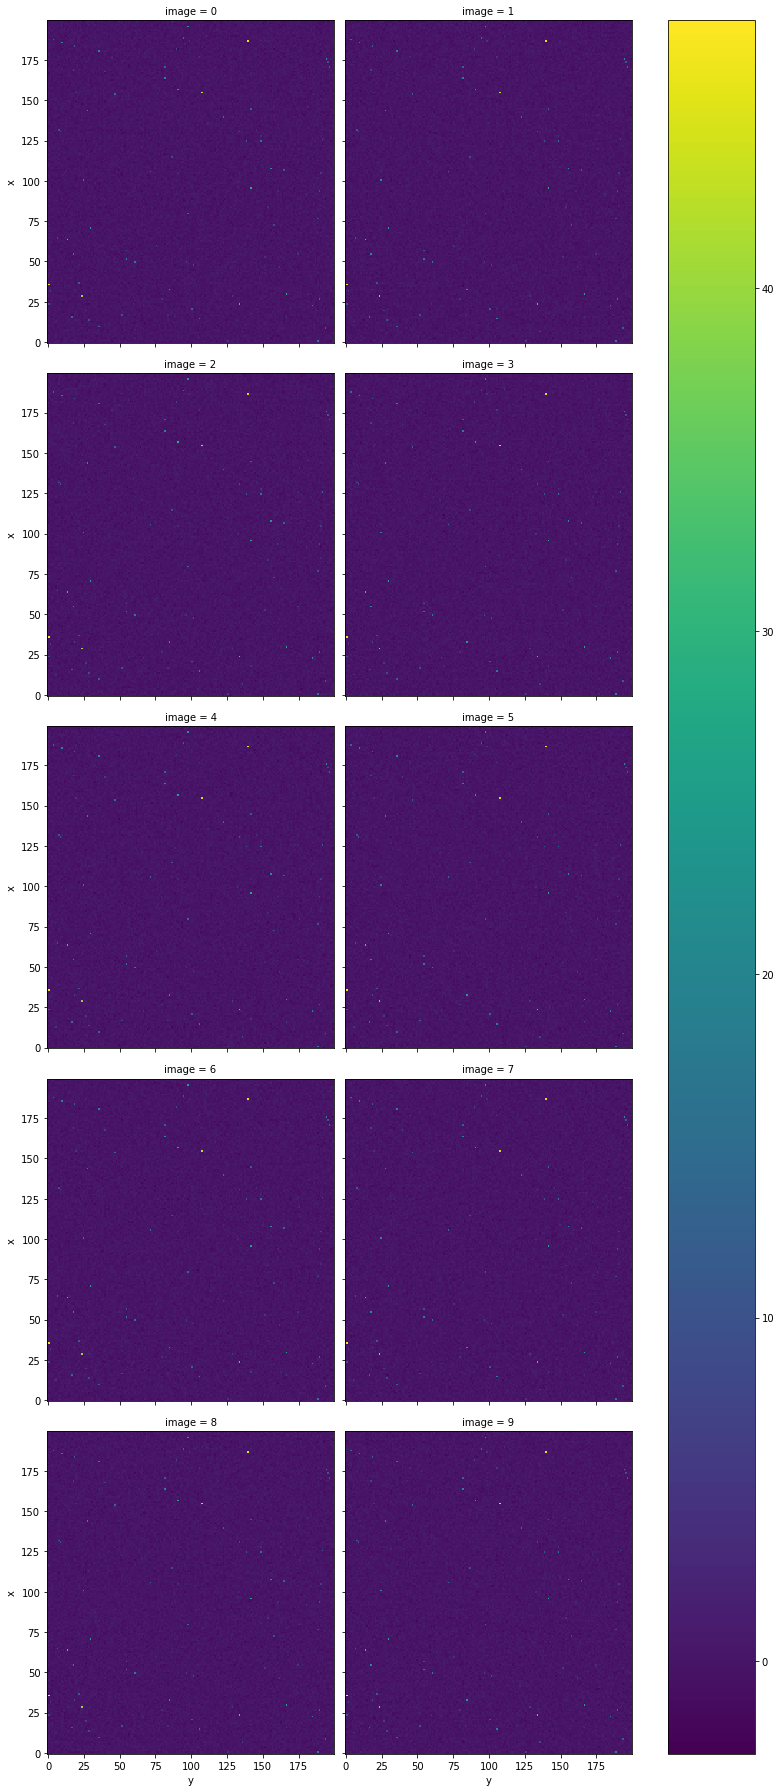

In [15]:
stack = xr.DataArray(hf5.get('imagestack')[:,:,:], coords=[np.arange(200), np.arange(200),np.arange(10)], dims=['x', 'y', 'image']).transpose('image','x','y')

stack.plot(center=False, col='image', col_wrap=2, size=5)
plt.show()


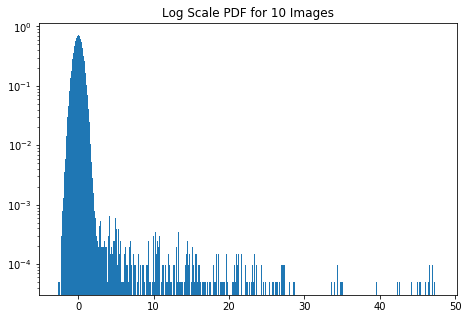

In [16]:
stack.plot.hist(bins=1000, density=True, size=5)
plt.title("Log Scale PDF for 10 Images")
plt.yscale("log")
plt.show()

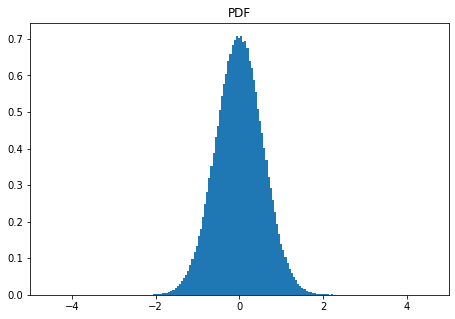

In [17]:
stack.plot.hist(bins=1000, density=True, size=5)
plt.title("PDF")
plt.xlim([-5,5])
plt.show()


In [18]:
# stack.plot.hist(bins=1000, density=True, size=5)
# plt.title("Log Scale PDF for 10 Images")
# plt.yscale("log")
# plt.show()

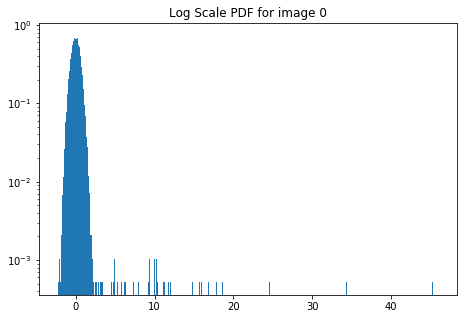

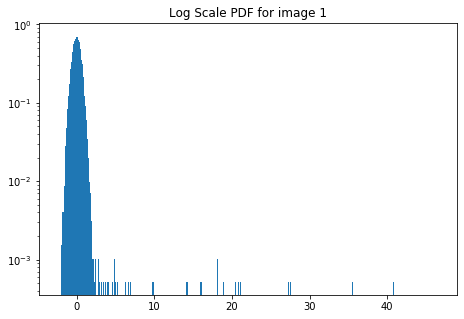

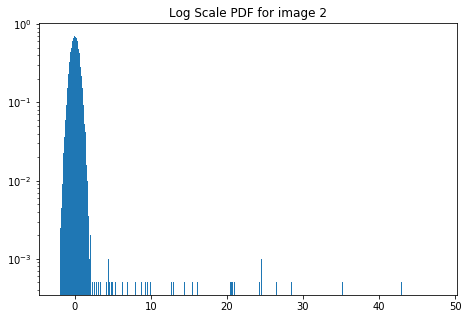

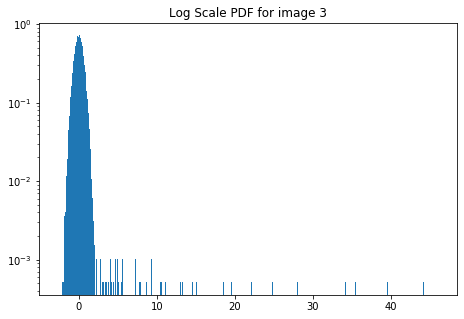

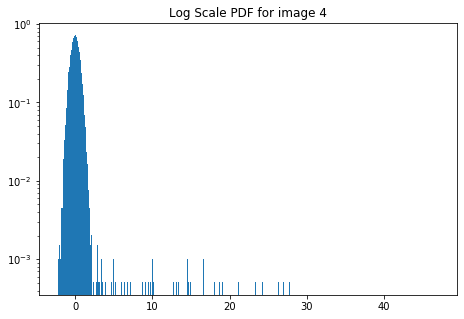

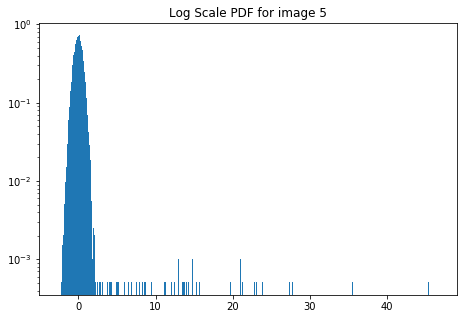

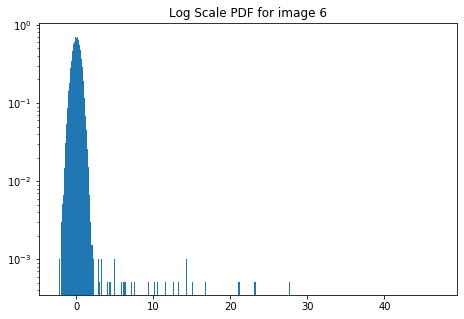

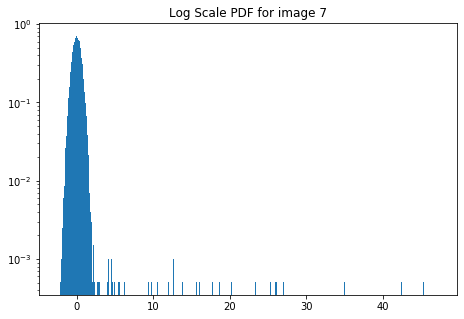

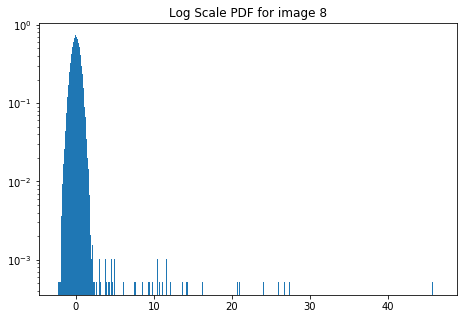

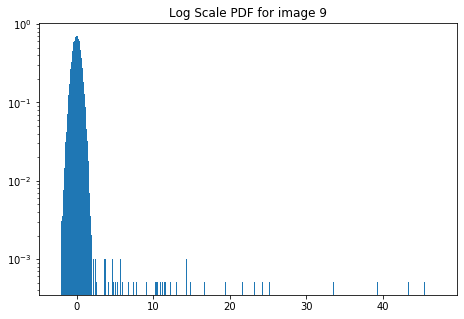

In [19]:
for i in np.arange(10):
    stack[i].plot.hist(bins=1000, density=True, size=5)
    plt.title(f"Log Scale PDF for image {i}")
    plt.yscale("log")
    plt.show()

In [20]:

for i in np.arange(10):
    print(f"max value for image {i}: {np.max(stack[i].values)}")

max value for image 0: 46.01175269422071
max value for image 1: 46.592267064916705
max value for image 2: 47.79010819628649
max value for image 3: 46.081120603006916
max value for image 4: 47.0003865702652
max value for image 5: 46.621316029297525
max value for image 6: 46.99131843066182
max value for image 7: 47.26324939630629
max value for image 8: 46.4883943499121
max value for image 9: 47.21296880302628


image 2 has the highest value at 47.79, it does not stand out significantly as there is only a 1.1% difference between it and the next highest which is image 7.

In [21]:
for i in np.arange(10):
    print(f"mean value for image {i}: {np.mean(stack[i].values)}")

mean value for image 0: 0.030218566576240936
mean value for image 1: 0.030805866173257253
mean value for image 2: 0.03804687710376909
mean value for image 3: 0.03359187121452332
mean value for image 4: 0.034415489746337076
mean value for image 5: 0.038142677896534125
mean value for image 6: 0.028322878663590813
mean value for image 7: 0.03184659318355503
mean value for image 8: 0.03324503541571217
mean value for image 9: 0.03580179806386976


the image with the highest average may point to a bright transient event. 
The image with the highest average intensity is image 5 and image 2 contained the transient event and there is only a difference of 0.25% between them. By considering both mean and max value, I consider image 2 has the transient events.

In [22]:
trimmed = stack.where(stack < 3)
mean = trimmed.mean().values
std = trimmed.std().values
print(f"This estimated background distribution is a Gaussian with a mean of {mean:.3f} and a standard deviation of {std:.3f}")

This estimated background distribution is a Gaussian with a mean of 0.001 and a standard deviation of 0.563


In [23]:
img_5sig = stats.norm.isf(five_sigma, loc=mean, scale=std)
print(f"A detection of at least {img_5sig:.2f} would be a 5 sigma event")
for i in np.arange(10):
    n = stack[i].where(stack[i] > img_5sig).count().values
    print(f"image {i}: {n}")
    

A detection of at least 2.82 would be a 5 sigma event
image 0: 101
image 1: 101
image 2: 101
image 3: 99
image 4: 99
image 5: 98
image 6: 101
image 7: 96
image 8: 98
image 9: 101
